## Capstone Project - Car accident severity (Week 2)

### Introduction

In this report, we are going to investigate the severity of the road accidents in the UK. The study is related only to personal injury accidents on public roads that are reported to the police, and subsequently recordered using the STATS19 accident reporting form. 

Road accidents severity has been an important problem for industry and government for many reasons. For instance, insurance companies would like to understand more the cause of the accident and its severity to help them make the business decisions that would improve the profit. For government, it wants to make the road safer for the gerenal public by improve the road conditions and traffic facilities. 

Hence, we think it is important to understand the cause of the car accident severity and their impact. 


### Data
In recent years, there has been an increasing demand for understanding the cause of the road accidents in the UK, there the Department for Tranport had made such data avaiable to the public for the first time. 

We obtained the data from <https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data> for the year of 2018. There are two datasets that are relevant to the study. 
* Vehicles data
* Accidents data

All the data variables are coded rather than containing textual strings, a lookup table is downloaded. 

In the accidents data, we can find the severity of the accidents as labelld as 1 to 3, which will be used as the target of the model. In both vehicles and accidents datasets, there are information about the vehicels that invlved in the accidents, and other relevant information such as the location, date, time, weather condition and etc. All of which can be used to determine the most important cause of the accidents. 

The data will be split into training set and testing set, where the training set is used to form the relationship between the cause and the severity, and the model will be tested on the testing set to verify the performance. 



In [1]:
import pandas as pd
import numpy as np 


In [61]:
#download datasets

Vehicles = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv')
Accidents = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv')


C:\Users\XChe\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Accidents.shape

(122635, 32)

#### Accidents Data
The dataset contains information about the accidents, there are 122,635 accidents found on the database. There are 32 columns in the dataset, where **Accident_Severity** is the target of the problem we are try to solve, the column **Accident_Index** is the unique ID that can be used to join different datasets together, for instance, the vehicles dataset below. The rest can be used as the potential factors when predicting the severity. The names of these columns are shown below. 

There are three levels of severity, and 1 is the highest and 3 is th lowest. The summary of all the accidents severity is shown below, that level 3 severity is the majority of the accidents. 

It notes not all columns are numerical, they are needed to be converted to numerical values before any modelling work. Such as the date and time columns should be in the correct format. 



In [4]:
Accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [5]:
Accidents.Accident_Severity.value_counts()

3    97799
2    23165
1     1671
Name: Accident_Severity, dtype: int64

In [62]:
Accidents['Date']=pd.to_datetime(Accidents['Date'])
pd.to_datetime(Accidents['Time'],format='%H:%M').dt.time

0         01:30:00
1         00:50:00
2         00:45:00
3         03:00:00
4         02:20:00
            ...   
122630    13:45:00
122631    10:45:00
122632    18:00:00
122633    11:50:00
122634    07:10:00
Name: Time, Length: 122635, dtype: object

#### Vehicles Data

In the vehicles data, there are 226,409 records that are associated with the accidents in the accidents data, that means for each accidents there might be more than one vehicles affected. There are 23 columns in the dataset, one of which is the unique ID, **Accident_Index**, that will be used to join with the accident data. All the rest of the data is numerical. 


In [7]:
Vehicles.dtypes
Vehicles['Accident_Index'].nunique()

122635

The vehicles data is joined to the accidents data by a left join using the unique ID, **Accident_Index**. After the merge, the combined dataset has 224,911 recordes and 122,635 are unique. Any NaN is removed. There the dataset **Combined** has 114,334 unique accidents. 

In [63]:
Combined = pd.merge(Accidents,Vehicles,how='left',on='Accident_Index')
Combined['Accident_Index'].nunique()

122635

In [33]:
Combined.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

In [70]:
Combined.dropna(inplace=True)
#Combined['Accident_Index'].nunique()

Accounding to the data guide, the value -1 is exported for NULL or out of range value. Therefore, we investigate the completeness of the data, by calculating the percentagel of -1 for each column as seen below. The variables that have more than 40% is -1 will be removed. They are 

* Junction_Control
* 2nd_Road_Class


In [39]:
for x in Combined.columns:
    print(x,Combined[x].loc[Combined[x]== -1].count()/Combined.shape[0])
    


Accident_Index 0.0
Location_Easting_OSGR 0.0
Location_Northing_OSGR 0.0
Longitude 0.0
Latitude 0.0
Police_Force 0.0
Accident_Severity 0.0
Number_of_Vehicles 0.0
Number_of_Casualties 0.0
Date 0.0
Day_of_Week 0.0
Time 0.0
Local_Authority_(District) 0.0
Local_Authority_(Highway) 0.0
1st_Road_Class 0.0
1st_Road_Number 0.0
Road_Type 0.0
Speed_limit 0.0
Junction_Detail 0.0056424554605169885
Junction_Control 0.43776759132366144
2nd_Road_Class 0.41721563253154387
2nd_Road_Number 0.0012475780917726006
Pedestrian_Crossing-Human_Control 0.024209630924814516
Pedestrian_Crossing-Physical_Facilities 0.021794811209300127
Light_Conditions 0.0
Weather_Conditions 0.0
Road_Surface_Conditions 0.009078020887481688
Special_Conditions_at_Site 0.011398327111195122
Carriageway_Hazards 0.00975851802844856
Urban_or_Rural_Area 0.0
Did_Police_Officer_Attend_Scene_of_Accident 0.0
LSOA_of_Accident_Location 0.0
Vehicle_Reference 0.0
Vehicle_Type 0.0013137375360332687
Towing_and_Articulation 0.018472661972496574
Vehic

In [64]:
Combined.drop(columns=['Junction_Control','2nd_Road_Class','Accident_Index','Time','Local_Authority_(Highway)','LSOA_of_Accident_Location'],inplace=True)

### Methodology

In this section, we are going to explore the variables available and select the ones that are important when determine the severity of an accident. We are going to solve the problem in the following steps:

1. Reduce the number of variables by identify the most important ones according to their correlation with accident severity.
2. For the identified variables, understand the interaction among them using a heat map. 
3. Create a decision tree using the identified variables to model the severity of an accident. We will build a classification decision tree for this question. It becauses the target of the problem is a multi-class classification. With the selected variables, the decision tree will create a set of rules to determine the severity of an accident. 




#### Correlation 
First of all, we produce the correlation matrix using the Spearman correlation coefficients. As the matrix below suggests, the variables are correlated to the severity of the accident in different degrees. The higher the absolute value, the stronger the relationship. The following variables are the ones that have the highest correlation.

* Did_Police_Officer_Attend_Scene_of_Accident	
* Skidding_and_Overturning
* Vehicle_Leaving_Carriageway
* Hit_Object_off_Carriageway
* Speed_limit
* Urban_or_Rural_Area
* Vehicle_Manoeuvre
* Hit_Object_in_Carriageway

Other variables that are usually assumed to be assicoiate with the severity of the accidents such as the age, gender of the driver, the weather condition, the time of the day and etc, are weakly correlated. 

In [41]:
Combined.corr(method='spearman')

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
Location_Easting_OSGR,1.000000,-0.326789,0.999685,-0.334248,-0.177634,0.018595,0.006418,-0.035662,0.004353,-0.188978,...,-0.060056,0.007221,-0.044568,-0.043740,0.019998,0.005858,-0.002772,0.107938,-0.015993,0.107938
Location_Northing_OSGR,-0.326789,1.000000,-0.316981,0.999893,-0.369497,-0.016606,-0.009691,0.037667,0.002487,-0.349979,...,-0.028165,-0.004876,0.000551,0.000799,-0.001772,0.016402,-0.020004,-0.122593,-0.034742,-0.122593
Longitude,0.999685,-0.316981,1.000000,-0.324465,-0.178099,0.018321,0.006082,-0.035054,0.004429,-0.189244,...,-0.060924,0.007206,-0.044301,-0.043468,0.020012,0.006031,-0.002557,0.106951,-0.014539,0.106951
Latitude,-0.334248,0.999893,-0.324465,1.000000,-0.367251,-0.016480,-0.009658,0.037624,0.002478,-0.347636,...,-0.027065,-0.004957,0.000632,0.000860,-0.001903,0.016283,-0.020142,-0.122244,-0.035058,-0.122244
Police_Force,-0.177634,-0.369497,-0.178099,-0.367251,1.000000,-0.052228,0.059167,0.067041,-0.004517,0.983824,...,-0.007557,-0.018619,0.088768,0.087714,-0.024985,-0.035673,0.033164,0.107152,0.161376,0.107152
Accident_Severity,0.018595,-0.016606,0.018321,-0.016480,-0.052228,1.000000,0.044016,-0.063437,0.004867,-0.050493,...,0.029029,0.069656,-0.058123,-0.058538,0.029906,0.025438,0.005590,-0.039233,-0.054723,-0.039233
Number_of_Vehicles,0.006418,-0.009691,0.006082,-0.009658,0.059167,0.044016,1.000000,0.245842,-0.000072,0.059958,...,0.011664,0.029417,0.008463,0.007308,0.062309,0.060348,0.003243,0.015153,0.002711,0.015153
Number_of_Casualties,-0.035662,0.037667,-0.035054,0.037624,0.067041,-0.063437,0.245842,1.000000,-0.005861,0.069636,...,-0.013115,-0.020321,0.063551,0.064442,0.132668,0.122715,0.096116,0.056600,0.090322,0.056600
Day_of_Week,0.004353,0.002487,0.004429,0.002478,-0.004517,0.004867,-0.000072,-0.005861,1.000000,-0.004783,...,0.006462,-0.003026,-0.006301,-0.006347,0.003313,0.004255,0.004401,-0.001970,-0.000902,-0.001970
Local_Authority_(District),-0.188978,-0.349979,-0.189244,-0.347636,0.983824,-0.050493,0.059958,0.069636,-0.004783,1.000000,...,0.004977,-0.015338,0.084935,0.083876,-0.022005,-0.032894,0.038450,0.098929,0.157265,0.098929


#### Identified Variables
For the identified variables, the correlations among them are calculated and are presented by the heat map below. It suggests **vehicle_Leaving_Carriageway** and **Hit_Object_off_Carriageway** are highly correlated, as well as **Speed_limit** and **Urban_or_Rural_Area**. 

To decide on which variales to take forward to the next step, addtional analysis is required. **Hit_Object_off_Carriageway** has higher proportion of invalid value -1 and the correlation between severity is slightly lower, hence, it will be discarded. 

**Urban_or_Rural_Area** has a simpler relationship with the severity, as for each severity, there are more in 1 - urban area than others, except severity 1 accidents. 

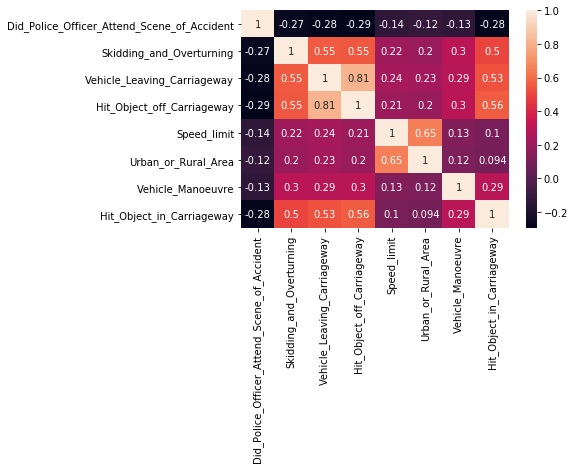

In [60]:
import seaborn as sn 
import matplotlib.pyplot as plt

X = Combined[['Did_Police_Officer_Attend_Scene_of_Accident', 'Skidding_and_Overturning', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', 'Speed_limit', 'Urban_or_Rural_Area', 'Vehicle_Manoeuvre', 'Hit_Object_in_Carriageway']]

corrMatrix = X.corr(method='spearman')

sn.heatmap(corrMatrix,annot=True)
plt.show()


In [64]:
pd.crosstab(X.Vehicle_Leaving_Carriageway,X.Hit_Object_off_Carriageway)

Hit_Object_off_Carriageway,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Vehicle_Leaving_Carriageway,,,,,,,,,,,,,
-1.0,9295,518,1,0,0,0,0,0,0,1,0,4,1
0.0,1,180592,154,48,19,55,4,78,83,0,14,163,89
1.0,4,5202,548,607,193,1082,58,50,398,6,588,1203,1016
2.0,5,361,52,77,34,149,7,21,197,0,24,286,132
3.0,1,397,112,35,5,37,2,6,13,0,21,143,100
4.0,0,273,55,24,2,26,0,311,39,0,3,22,4
5.0,0,122,17,5,0,2,0,308,19,0,1,7,1
6.0,0,75,11,13,1,11,1,35,7,0,2,19,6
7.0,1,2315,263,199,95,582,19,23,72,3,366,691,630


In [71]:
pd.crosstab(Y.Accident_Severity,X.Urban_or_Rural_Area)

Urban_or_Rural_Area,1,2
Accident_Severity,,
1,942,1767
2,22423,15212
3,116234,55032


Therefore, the identified variables are reduced by two further. We are going to investigate further the relation between the accident severity and the listed variables above. The figures show the relationship between each variable and the severity. 

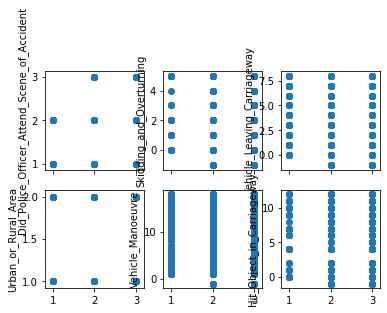

In [17]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,3,sharex=True,sharey=False)
ax[0,0].scatter(Combined.Accident_Severity,Combined.Did_Police_Officer_Attend_Scene_of_Accident)
ax[0,0].set_ylabel('Did_Police_Officer_Attend_Scene_of_Accident')

ax[0,1].scatter(Combined.Accident_Severity,Combined.Skidding_and_Overturning)
ax[0,1].set_ylabel('Skidding_and_Overturning')

ax[0,2].scatter(Combined.Accident_Severity,Combined.Vehicle_Leaving_Carriageway)
ax[0,2].set_ylabel('Vehicle_Leaving_Carriageway')

ax[1,0].scatter(Combined.Accident_Severity,Combined.Urban_or_Rural_Area)
ax[1,0].set_ylabel('Urban_or_Rural_Area')

ax[1,1].scatter(Combined.Accident_Severity,Combined.Vehicle_Manoeuvre)
ax[1,1].set_ylabel('Vehicle_Manoeuvre')

ax[1,2].scatter(Combined.Accident_Severity,Combined.Hit_Object_in_Carriageway)
ax[1,2].set_ylabel('Hit_Object_in_Carriageway')

plt.show()


#### Decision Tree

We are going to use a classification decision tree to model the severity of an accident based on the selected variables. 

We define the follow two datasets 

* X as the **Accident_Severity**
* Y as the six variables, **Did_Police_Officer_Attend_Scene_of_Accident**, **Skidding_and_Overturning**, **Vehicle_Leaving_Carriageway**, **Urban_or_Rural_Area**, **Vehicle_Manoeuvre**, **Hit_Object_in_Carriageway**

In [72]:
Y = Combined[['Accident_Severity']]
X = Combined[['Did_Police_Officer_Attend_Scene_of_Accident', 'Skidding_and_Overturning', 'Vehicle_Leaving_Carriageway', 'Urban_or_Rural_Area', 'Vehicle_Manoeuvre', 'Hit_Object_in_Carriageway']].values


As for all manchine learning modelling, we need to split the data into training and testing datasets. We use the **train_test_split** module from **sklearn.model_selection** to split the datasets into **x_train**, **x_test**, **y_train** and **y_test**. The train and test datasets are splited as 70 : 30, and using **random_state**=123 to allow replication in the further. 

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.7,random_state=123)

In [10]:
np.sum(pd.isnull(x_train))
x_train.shape

(63483, 6)

We are using the modul **DecisionTreeClassifier** from **sklearn.tree** to create the tree. We have created an initial tree by allowing the theorm to define the depth of the tree. However, the tree created in such way is over-complicated, and is prone to over-fitting. 

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

|--- feature_0 <= 1.50
|   |--- feature_4 <= 8.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_4 >  0.00
|   |   |   |   |   |   |--- feature_5 <= 7.50
|   |   |   |   |   |   |   |--- feature_5 <= 2.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_1 >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |  

[Text(180.7102483658929, 212.71304347826086, 'X[0] <= 1.5\ngini = 0.313\nsamples = 63483\nvalue = [846, 11242, 51395]'),
 Text(85.2849097374425, 203.2591304347826, 'X[4] <= 8.5\ngini = 0.352\nsamples = 45197\nvalue = [751, 9266, 35180]'),
 Text(24.24559320206956, 193.80521739130435, 'X[4] <= 2.5\ngini = 0.271\nsamples = 12068\nvalue = [83, 1850, 10135]'),
 Text(9.735728657660246, 184.3513043478261, 'X[3] <= 1.5\ngini = 0.35\nsamples = 2585\nvalue = [38, 532, 2015]'),
 Text(6.768496694452429, 174.89739130434782, 'X[2] <= 1.5\ngini = 0.334\nsamples = 2034\nvalue = [19, 406, 1609]'),
 Text(4.683414774360449, 165.44347826086957, 'X[4] <= 0.0\ngini = 0.331\nsamples = 2009\nvalue = [18, 397, 1594]'),
 Text(4.426789307272204, 155.98956521739132, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(4.940040241448692, 155.98956521739132, 'X[5] <= 7.5\ngini = 0.332\nsamples = 2005\nvalue = [18, 397, 1590]'),
 Text(3.4644438056912907, 146.53565217391304, 'X[5] <= 2.0\ngini = 0.331\nsamples = 1988

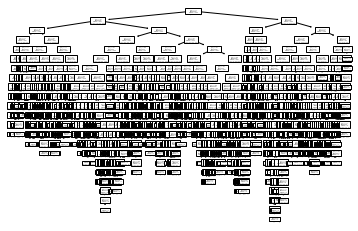

In [13]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

r = export_text(clf)
print(r)

plot_tree(clf)

To aviod over-fitting, we specified the max depth of the tree to be 7 and the minimum sample leaf size is 10. The small tree is less complicated. Now, we will test the accuary of the prediction of the small tree with the test datasets, **x_test** and **y_test**. The accuracy score of the model using the test datasets is 81%, and the actual vs expected plot is shown below. 

|--- feature_0 <= 1.50
|   |--- feature_4 <= 8.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- feature_5 <= 7.50
|   |   |   |   |   |   |--- feature_5 <= 2.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_5 >  2.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_5 >  7.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 2.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_5 >  2.00
|   |   |   |   

[Text(167.77144970414201, 203.85, 'X[0] <= 1.5\ngini = 0.313\nsamples = 63483\nvalue = [846, 11242, 51395]'),
 Text(79.98550295857989, 176.67000000000002, 'X[4] <= 8.5\ngini = 0.352\nsamples = 45197\nvalue = [751, 9266, 35180]'),
 Text(32.93520710059172, 149.49, 'X[4] <= 2.5\ngini = 0.271\nsamples = 12068\nvalue = [83, 1850, 10135]'),
 Text(14.857988165680474, 122.31, 'X[3] <= 1.5\ngini = 0.35\nsamples = 2585\nvalue = [38, 532, 2015]'),
 Text(9.905325443786984, 95.13, 'X[2] <= 1.5\ngini = 0.334\nsamples = 2034\nvalue = [19, 406, 1609]'),
 Text(5.943195266272189, 67.94999999999999, 'X[5] <= 7.5\ngini = 0.331\nsamples = 2009\nvalue = [18, 397, 1594]'),
 Text(3.9621301775147932, 40.77000000000001, 'X[5] <= 2.0\ngini = 0.33\nsamples = 1992\nvalue = [18, 392, 1582]'),
 Text(1.9810650887573966, 13.590000000000003, 'gini = 0.334\nsamples = 1887\nvalue = [18, 376, 1493]'),
 Text(5.943195266272189, 13.590000000000003, 'gini = 0.258\nsamples = 105\nvalue = [0, 16, 89]'),
 Text(7.9242603550295865

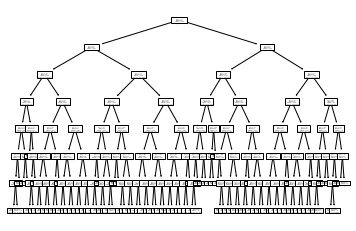

In [133]:
clfSmall = DecisionTreeClassifier(max_depth=7,min_samples_leaf=10)
clfSmall = clfSmall.fit(x_train,y_train)

r = export_text(clfSmall)
print(r)
plot_tree(clfSmall)

In [134]:
from sklearn import metrics

PredY = clfSmall.predict(x_test)

metrics.accuracy_score(y_test,PredY)

0.8087992060866689

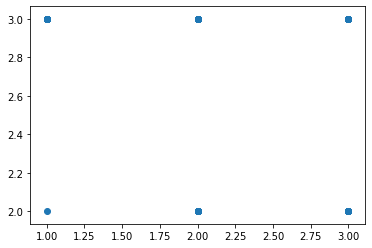

In [135]:
fig,ax = plt.subplots(1,1)
ax.scatter(y_test,PredY)
plt.show()

### Results and Discussion

We the question we try to address is identify the factors that would have an impact on the severity of an accident if happens, and secondly, when an accident occurs given the information about these factors, what is the severity of the accident. The result is presented by the graph of the decision tree below. 

Our analysis show among the factors found in the datasets, there is no one factor that is significantly relevant to the serverity of an accident according to their Spearman correlation coefficients with the severity. However, a handful of factors are selected what are have relatively high correlation coefficients. 

We built a decision tree using the selected factors to predict the severity of an accident. The decision tree that does not have any constrains is very complicated and subject to over-fitting. Then we imposed some requirement on the tree, we set the maximum depth of the tree to be 7 and the minimum sample leaf is 10. The final decision tree has high accuracy score that exceeds 80%. 

However, we also note that the decision tree only produce outcomes of severity 2 and 3 based on the given information. It could not be able to predict severity 1 accident, and most of the branches end up of severity 3. There are only two suitations where it results in severity 2 accident. They are:

* Police officer attend scene of accident, Vehicle is leaving the carriageway and it hit one of the objects, central island of roundabout, kerb, other object or any animal. 
* Police officer attend scene of accident, in an rural area, Vehicle is leaving the carriageway, it tried to skidding or overturning and it hit one of the objects, other object or any animal.





In [136]:
import graphviz 
from sklearn import tree
featureName=['Did_Police_Officer_Attend_Scene_of_Accident', 'Skidding_and_Overturning', 'Vehicle_Leaving_Carriageway', 'Urban_or_Rural_Area', 'Vehicle_Manoeuvre', 'Hit_Object_in_Carriageway']
dot_data = tree.export_graphviz(clfSmall, out_file=None,class_names=True,feature_names=featureName) 
graph = graphviz.Source(dot_data) 
graph.render('Accidents_Severity')

'Accidents_Severity.pdf'

### Conclusion

The purpose of this study is to identify the factors that have an impact on the severity of an accident if it happens, and given these information about these factors, what is the severity of the accident. 

We have identify the following factors that have an impact:

* Did police officer attend scene of accident
* Skidding and overturning
* Vehicle leaving carriageway
* Urban or rural area
* Vehicle manoeuvre
* Hit object in carriageway

There are two suitations where it results in severity 2 accident. All the rest suitations would be a severity 3 accident. The decision tree is unable to predict severity 1 accident with the given information. 

The decision tree is easy to understand and intuitive. It has high accuracy score using the testing datasets. 

For insurance companies, they may found the studies does not provide direct advice on their products. However, for govervement and authority, this is particular useful insighs, with these information, the roads can be made safer for the general public, for example, put up more sign on carriageways reminding of the change of layout and provide more police when an accident happens. 
